In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine, load_diabetes
from sklearn.model_selection import train_test_split
import sys
sys.path.append('../../src') # Temporarily adding the src folder to the path
from RandomForest import RandomForestClassifier

## Dataset

In [3]:
# initialize an instance of load_wine
wine = load_wine()

In [4]:
# Create data and target 
X = DataFrame(wine.data, columns=wine.feature_names)
y = DataFrame(wine.target, columns=['type'])

### Data exploration and visualization

This is not a complete exploration of the data as the goal of this exercise is to test that our code works. Nonetheless, it is a good practice to check that the data is loaded correctly and get an overview of the features. Feel free to expand this

In [10]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

In [12]:
X.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


### Data Visualization

<Axes: ylabel='Count'>

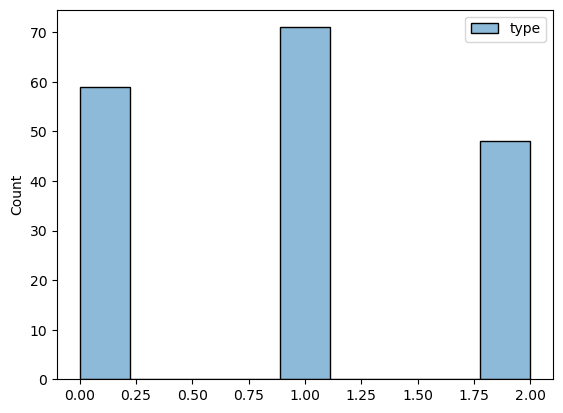

In [15]:
sns.histplot(y)

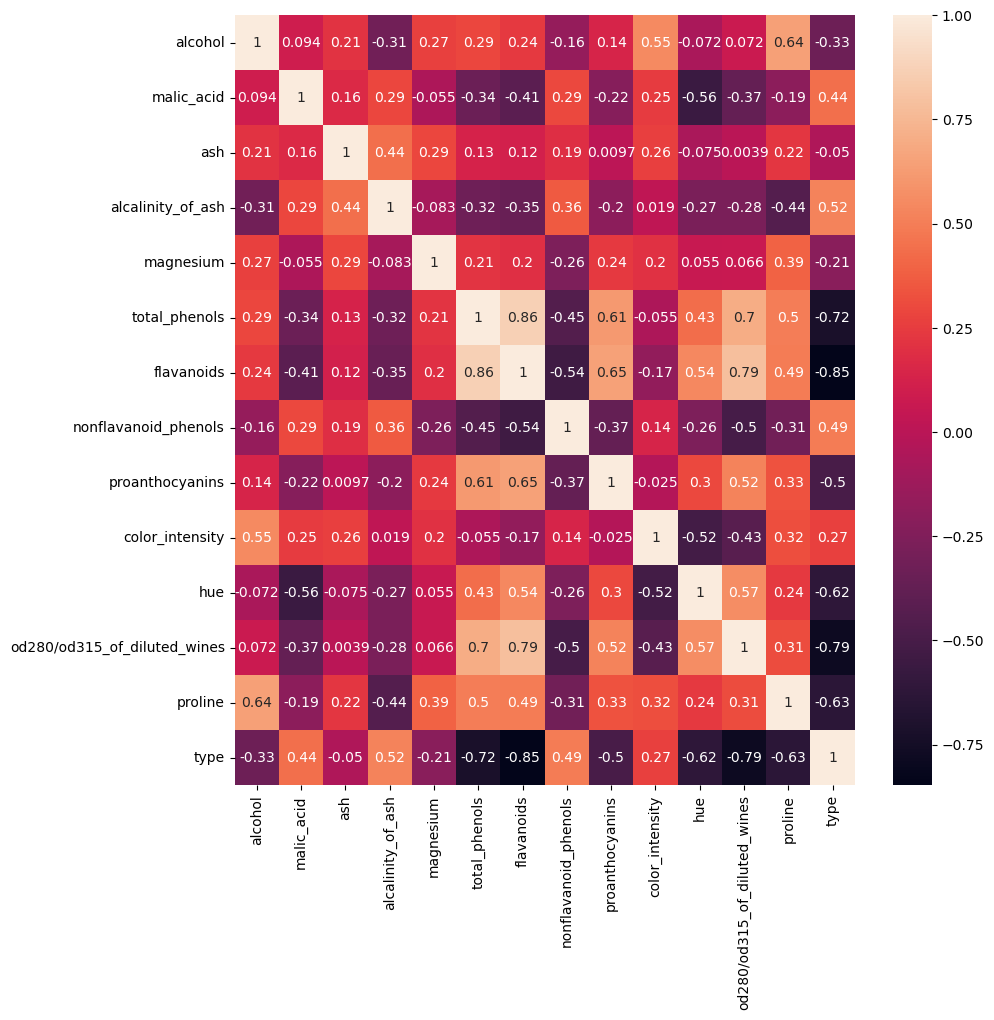

In [17]:
wine_df = X
wine_df['type'] = y
corrs = wine_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrs, annot=True);

### Splitting the data to train and test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

### Apply Random Forest

In [51]:
rfc = RandomForestClassifier(n_estimators=10)

In [53]:
rfc.fit(X_train, y_train)

In [54]:
y_pred = rfc.predict(X_test)

In [55]:
from metrics import accuracy_score, confusion_matrix

array([[15,  0,  0],
       [ 0, 18,  0],
       [ 0,  0, 12]])

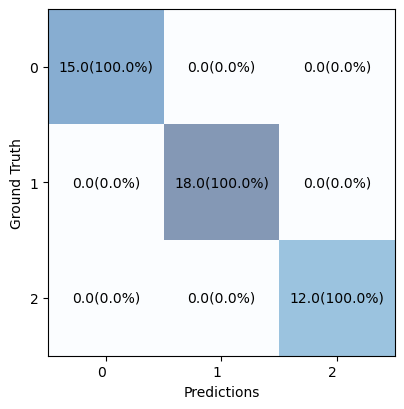

In [61]:
confusion_matrix(y_test.to_numpy().flatten(), y_pred, visualize=True)

In [63]:
accuracy_score(y_test.to_numpy().flatten(), y_pred)

1.0

### Comparison with sklearn

In [66]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix, accuracy_score

In [68]:
skrfc = RFC(n_estimators=10)

In [70]:
skrfc.fit(X_train, y_train.to_numpy().flatten())

RandomForestClassifier(n_estimators=10)

In [72]:
sk_pred = skrfc.predict(X_test)

In [74]:
confusion_matrix(y_test, sk_pred)

array([[15,  0,  0],
       [ 0, 18,  0],
       [ 0,  2, 10]], dtype=int64)